In [1]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics, tree

from palmerpenguins import load_penguins

In [2]:
# Load the penguins data from palmerpenguins module
penguins = load_penguins()

# Drop penguins with missing values
penguins = penguins.dropna()

# Calculate summary statistics using .describe()
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [3]:
# Save output features as y
y = penguins[['species']]

# Save input features as x
X = penguins[['flipper_length_mm', 'bill_length_mm']]

# Initialize the model
classtreeModel = DecisionTreeClassifier(max_depth=2)

# Fit the model
classtreeModel = classtreeModel.fit(X, y)

In [4]:
# Print tree as text
print(export_text(classtreeModel, feature_names=X.columns.to_list()))

|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 43.35
|   |   |--- class: Adelie
|   |--- bill_length_mm >  43.35
|   |   |--- class: Chinstrap
|--- flipper_length_mm >  206.50
|   |--- bill_length_mm <= 40.85
|   |   |--- class: Adelie
|   |--- bill_length_mm >  40.85
|   |   |--- class: Gentoo



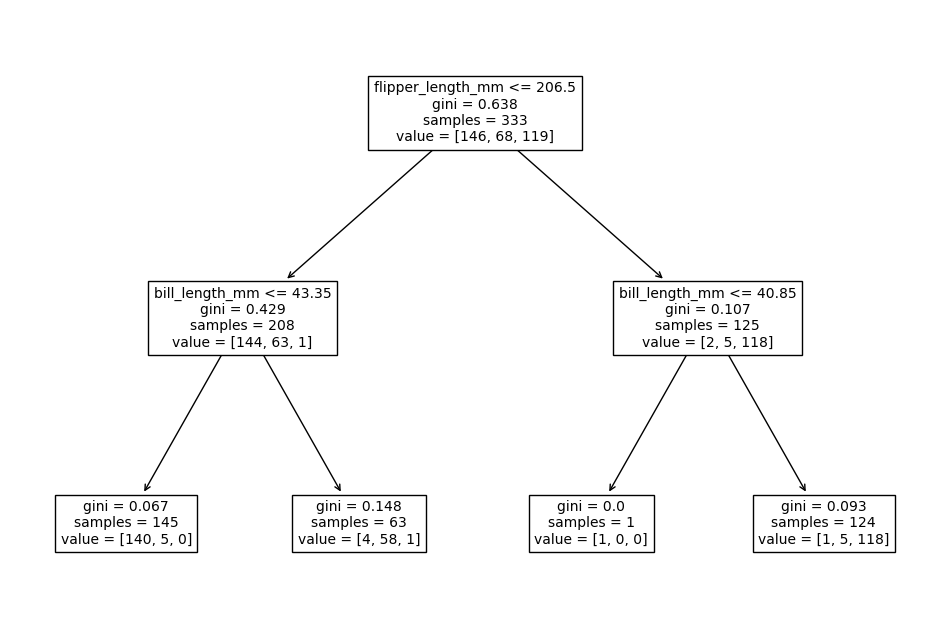

In [5]:
# Resize the plotting window
plt.figure(figsize=[12, 8])

# Values in brackets represent classes in alphabetical order
# [Adelie, Chinstrap, Gentoo]
p = tree.plot_tree(classtreeModel, feature_names=X.columns, filled=False, fontsize=10)

Cross-entropy:  0.20553398953726887
Error rate:  0.048048048048048075


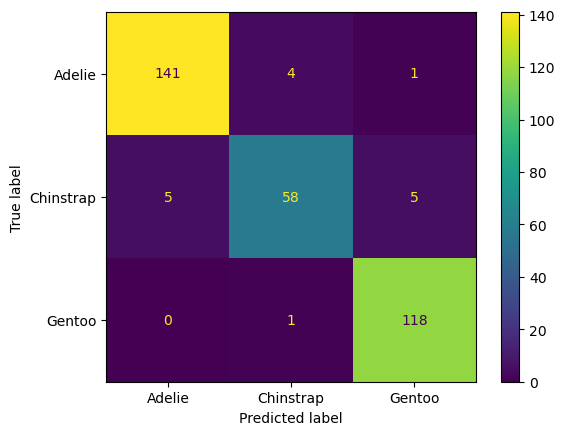

In [6]:
# Calculate cross-entroy and error rate

print("Cross-entropy: ", metrics.log_loss(y, classtreeModel.predict_proba(X)))
print("Error rate: ", 1 - metrics.accuracy_score(y, classtreeModel.predict(X)))

# Calculate the confusion matrix
metrics.confusion_matrix(y, classtreeModel.predict(X))

# Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y, classtreeModel.predict(X))

In [7]:
# Calculate the Gini index
probs = pd.DataFrame(data=classtreeModel.predict_proba(X))

print("Gini index: ", (probs * (1 - probs)).mean().sum())

Gini index:  0.09155707431569521
